In [32]:
import os
import librosa
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split 

Constants

In [1]:
%store -r DATA_LOCATION 
%store -r GENRES

Functions:

In [22]:
def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None 
     
    return mfccsscaled

# 3. Data Preprocessing

Following on from the previous notebook, we identifed the following audio properties that need preprocessing to ensure consistency across the whole dataset:

- Sample rate
- Bit-depth

We will use Librosa library to normalize our audio files.

##### Example:

Here we will see the effect of the Librosa library in one of our audio files (*blues.00001.au*):

In [6]:
filename = DATA_LOCATION + 'blues/blues.00001.au' 

librosa_audio, librosa_sample_rate = librosa.load(filename) 

print('Librosa sample rate:', librosa_sample_rate) 

Librosa sample rate: 22050


All the audios files will be set with **sample rate 2205**.

In [8]:
print('Librosa audio file min~max range:', np.min(librosa_audio), 'to', np.max(librosa_audio))

Librosa audio file min~max range: -0.6820679 to 0.6838074


Librosa’s load function will also normalise the data so it's values range between -1 and 1. This removes the complication of the dataset having a wide range of bit-depths.

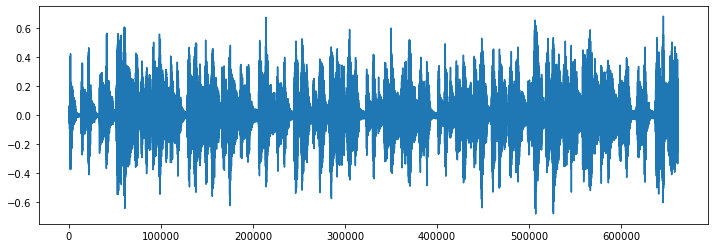

In [41]:
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio);

# 4. Extract Data Features

As we already show in the first notebook we can get the spectrum of each signal. So what we will do next is to extract features from thoses spectrums. In particular, we are going to extract Mel-Frequency Cepstral Coefficients (MFCC) from the the audio samples.

##### Example:

In [19]:
mfccs = librosa.feature.mfcc(y=librosa_audio, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape) 

(40, 1293)


This shows librosa calculated a series of 40 MFCCs over 1293 frames

Let's now calculate all the features for each sample:

In [42]:
features = []
for genre in GENRES:
    for i in range(100):
        file_name = os.path.join(os.path.abspath(DATA_LOCATION), genre + '/', genre + '.' + str(i).rjust(5, '0') + '.au')
        data = extract_features(file_name)
        
        features.append([data, genre])

featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

print('Finished feature extraction from ', len(featuresdf), ' files') 

Finished feature extraction from  1000  files


This is a sample of the resultant dataframe:

In [43]:
featuresdf.head()

,feature,class_label
0,"[-113.57065, 121.57179, -19.168142, 42.36642, ...",blues
1,"[-207.5017, 123.991264, 8.955127, 35.877647, 2...",blues
2,"[-90.722595, 140.4463, -29.09389, 31.684334, -...",blues
3,"[-199.5442, 150.0909, 5.6626782, 26.85908, 1.7...",blues
4,"[-160.3377, 126.219635, -35.58781, 22.148071, ...",blues


As we may see, per each row we will find 40 features:

In [44]:
featuresdf.iloc[0,][0], len(featuresdf.iloc[0,][0])

(array([-1.1357065e+02,  1.2157179e+02, -1.9168142e+01,  4.2366421e+01,
        -6.3646641e+00,  1.8623499e+01, -1.3704889e+01,  1.5343150e+01,
        -1.2274110e+01,  1.0976572e+01, -8.3265734e+00,  8.8037920e+00,
        -3.6723001e+00,  5.7479949e+00, -5.1628819e+00,  7.5273985e-01,
        -1.6902146e+00, -4.0897897e-01, -2.3035226e+00,  1.2212901e+00,
        -3.5343499e+00, -1.1414334e+00, -4.2830324e+00, -4.2261953e+00,
         9.1561663e-01,  9.1268724e-01, -5.7613473e+00, -3.9327433e+00,
         1.5108240e+00,  2.6988823e+00,  5.6574712e+00, -3.2662375e+00,
        -2.0303418e-01, -3.0002940e+00,  4.4772329e+00, -4.7590590e-01,
         6.0092382e+00, -5.8892500e-02, -3.4585075e+00, -1.8423905e+00],
       dtype=float32),
 40)

Also, it should be noted that we have a balanced dataset as we have the same amount of samples per genre:

In [45]:
featuresdf.class_label.value_counts()

hiphop       100
jazz         100
blues        100
classical    100
reggae       100
pop          100
country      100
metal        100
disco        100
rock         100
Name: class_label, dtype: int64

Next convert the data and labels:

In [46]:
# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y)) 

Here we may see how each genre has been converted into an array of 0s and 1 where the 1 value indicates which genre is depending on its position.

In [47]:
yy

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

Finally let's split dataset into training and test:

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

As in the other notebook, let's save the following variables for the next notebook

In [49]:
%store x_train 
%store x_test 
%store y_train 
%store y_test 
%store yy 
%store le

Stored 'x_train' (ndarray)
Stored 'x_test' (ndarray)
Stored 'y_train' (ndarray)
Stored 'y_test' (ndarray)
Stored 'yy' (ndarray)
Stored 'le' (LabelEncoder)
